**Objective**: Supply Chain Transactions are at high risk because more that 4% transactions are fraud. We have developed a model which on the basis of some parameters will predict that a supply chain transaction is fraud or not. 


**References** :
https://towardsdatascience.com/real-time-fraud-detection-with-machine-learning-485fa502087e
https://www.youtube.com/watch?v=frM_7UMD_-A


**Dataset** : 
https://www.kaggle.com/mlg-ulb/creditcardfraud


**About Dataset** :
1.  The dataset contains transactions made by credit cards in September 2013 by European cardholders.
2.  This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

1.   The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
2.   Due to confidentiality issues, we cannot provide the original features and more background information about the data.

1.   Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
2.   Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.









We want to work on Fraud Detection in Supply Chain Transactions, as this is a sensitive topic we are not able to retrieve the best dataset due to confidentiality issues, thus we decided to go with a dummy dataset. The Dummy dataset has its features transformed with PCA.


**PCA (Principal Component Analysis)** :
PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets.
What actually happened is, there were 28 features (X) responsible for prediction of fraud (y) but due to confidentiality issues researchers were not able to present all those features to users. They renamed those features to V1, V2, V3, V4 and so on, and reduced their values with help of PCA, then they presented that data on site.


**According to our brainstorming those 28 features might be** :

1. Bank name
2. Unusual Location 
3. Transaction history - Fraudulent
4. Fixed IP Address 
5. Mobile number history (involved in fraud or not)
6. Email host connected to credit card
7. First time customers
8. Many transactions in short span of time
9. Several cards saved from the same ip address
10. Shipping and billing address is not the same
11. Bigger than avg orders
12. Multiple credit cards registered on same mobile number
13. New customer id(bank’s perspective)
14. Card testing attempts
15. Use of vpn
16. Billing address vs the address usually the bank has
17. Multiple declined transactions in a row
18. Amount of loan on credit card holder


## **Import All the libraries needed**

In [257]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import pickle

## **Loading Dataset**
All the dataset has been first uploaded in colab and then worked on. Dataset is available on https://www.kaggle.com/mlg-ulb/creditcardfraud

In [258]:
df = pd.read_csv(r'/content/creditcard.csv')

## **Taking info of dataset**
Finding information of dataset is important to find if any need of cleaning the data is there or data is ready to go.

In [259]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [260]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [261]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [262]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


###**Quality Check**
From the information of data we can see that:


*   Last row has to be deleted as it contains lot of Null values.
*   All the columns are in their best state as they have undergone PCA.

*   Time to be converted into float just to make data consistant.





## **Implementing the Quality Check**

In [263]:
#Last row has to be deleted as it contains lot of Null values.
df.dropna(inplace = True)

In [264]:
#Time to be converted into float just to make data consistant.
df['Time'] = df['Time'].astype(float)

## **Checking all info again after cleaning data**

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Checking number of null values in each column**

In [266]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###**Check the distribution of legit transaction and fraudulent transaction**

In [267]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Observations**:


*   We can observe that this data is very unbalanced because there is very less fraudulent data.
*   We can't feed this data to our machine learning model, as the data is unbalanced our machine learning model will not be able to learn properly.
*   Here the pre-processing comes into picture.



## **Analysis of data for observations**

0 --> Normal Transaction

1 --> Fraudulent Transaction

In [268]:
# Seperating data for analysis
normal_data = df[df.Class == 0]
fraud_data = df[df.Class == 1]

In [269]:
normal_data.shape, fraud_data.shape

((284315, 31), (492, 31))

In [270]:
# Statistical measures of data
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [271]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

We observed that the mean value of fraud_transaction is much higher than that of normal transaction

In [272]:
# Compare the values for both transactions 
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## **Under-Sampling**

We will now build a sample dataset comtaining similar distribution of normal transactions and fraudulent transactions

Number of fraudulent transactions --> 88

In [273]:
normal_sample = normal_data.sample(n=88, random_state=16)

Concatenating two DataFrames

In [274]:
new_df = pd.concat([normal_sample, fraud_data], axis = 0)

**What we have done here?**

*   We observed that mean of fraudulent data is too high than that of normal data.
*   We also observed that number of samples of normal data is too high thann that of fraudulent data.


*   So we decided to reduce size of normal data to equal to fraudulent data to balance them.
*   We created a new dataframe containing same size of normal data and fraudulent data named new_df.





## **Finding the info for new dataframe**

In [275]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 51979 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    580 non-null    float64
 1   V1      580 non-null    float64
 2   V2      580 non-null    float64
 3   V3      580 non-null    float64
 4   V4      580 non-null    float64
 5   V5      580 non-null    float64
 6   V6      580 non-null    float64
 7   V7      580 non-null    float64
 8   V8      580 non-null    float64
 9   V9      580 non-null    float64
 10  V10     580 non-null    float64
 11  V11     580 non-null    float64
 12  V12     580 non-null    float64
 13  V13     580 non-null    float64
 14  V14     580 non-null    float64
 15  V15     580 non-null    float64
 16  V16     580 non-null    float64
 17  V17     580 non-null    float64
 18  V18     580 non-null    float64
 19  V19     580 non-null    float64
 20  V20     580 non-null    float64
 21  V21     580 non-null    float64


In [276]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51979,45222.0,-0.317927,0.648312,1.624859,0.267913,-0.237757,-0.515703,0.681027,-0.079390,-0.193074,-0.583269,-0.498877,0.802258,1.598292,-0.372974,0.318121,0.706222,-1.101520,0.118085,-1.315703,0.039077,0.266149,0.711746,0.279185,0.393295,-1.091260,-0.797751,0.255480,0.262938,75.00,0
84631,60395.0,0.693093,-0.930823,1.632571,1.704740,-1.073793,1.810516,-1.093926,0.704122,1.409583,-0.375282,0.702614,1.697881,-0.218279,-0.822427,-1.785337,-0.901625,0.627218,-0.614962,-0.303595,0.064068,0.124163,0.592750,-0.170988,-0.235590,0.331660,-0.197696,0.112932,0.045968,146.99,0
69739,53564.0,-1.649465,-0.920604,1.237397,-1.529838,-0.968009,0.495407,-0.492841,0.961520,-0.936721,-0.182815,0.931102,-0.569396,-1.519410,0.182442,-0.500237,0.978673,0.700231,-1.171254,-0.529364,0.462410,0.637725,1.282909,0.234751,-0.290769,-0.029705,-0.139785,0.209266,0.023669,184.00,0
222933,143183.0,-1.815309,1.915669,-3.376124,0.118831,2.611339,-1.213732,-1.302052,-6.354147,0.132964,-0.257800,0.969866,0.162517,-1.749890,-0.850819,-0.548995,-0.355501,1.864541,1.459691,0.499701,-0.489684,1.933600,0.797635,-0.451280,-0.550410,-1.236321,-0.394900,1.007601,0.227959,1.00,0
77677,57161.0,-0.807497,1.283790,1.190637,1.260214,-0.181725,0.240947,0.224861,0.641904,-0.798405,-0.178563,1.174892,1.268504,0.159481,0.466936,-0.579352,-0.978068,0.600348,-0.257250,0.926711,0.065105,0.080128,0.441809,-0.072602,0.244401,-0.108323,-0.252143,0.300939,0.135244,17.78,0


In [277]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [278]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,81820.877586,-4.035194,3.060709,-5.919898,3.848031,-2.660746,-1.199269,-4.704265,0.466220,-2.160556,-4.786329,3.223902,-5.302893,-0.115884,-5.937315,-0.072254,-3.521976,-5.675965,-1.922976,0.585658,0.314961,0.604223,0.027809,-0.040439,-0.094170,0.021346,0.034267,0.110945,0.045916,114.078655,0.848276
std,46988.819063,6.512969,4.194729,7.087497,3.149389,5.110399,1.818601,6.982035,6.322079,2.633323,5.082231,2.862334,4.865112,1.102565,4.708276,1.037014,3.865569,6.846447,2.790954,1.468845,1.257228,3.577378,1.406141,1.463554,0.531032,0.779012,0.482471,1.584097,0.704664,240.359842,0.359063
min,406.000000,-30.552380,-8.402154,-31.103685,-3.313248,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-2.681336,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,41808.250000,-5.226928,0.645806,-7.525227,1.348861,-3.746406,-2.265154,-6.316360,-0.146842,-3.644695,-6.732123,1.053452,-8.079829,-0.967237,-9.072711,-0.583915,-6.211557,-10.474915,-3.995433,-0.354907,-0.182848,-0.048421,-0.541429,-0.321772,-0.435117,-0.327426,-0.266047,-0.028768,-0.074932,1.000000,1.000000
50%,76276.500000,-1.808752,2.127372,-4.160731,3.542914,-1.124336,-1.167652,-2.283397,0.475602,-1.694182,-3.916628,3.083168,-4.606402,-0.089488,-5.862492,-0.056046,-2.660322,-4.433420,-1.080045,0.552273,0.221741,0.448781,0.063897,-0.053641,-0.035092,0.050685,-0.004840,0.262587,0.105192,11.395000,1.000000
75%,128483.000000,0.051977,4.212520,-1.085323,6.046820,0.368641,-0.201879,-0.182615,1.451148,-0.391540,-0.854891,4.820673,-0.816628,0.662291,-1.616882,0.621829,-0.348723,-0.096874,0.124371,1.425041,0.674227,1.132651,0.620863,0.239564,0.321289,0.438159,0.372649,0.707586,0.328629,104.225000,1.000000
max,170348.000000,2.160390,22.057729,9.382558,12.114672,11.095089,6.474115,15.661716,20.007208,15.594995,23.745136,12.018913,1.762389,2.815440,3.442422,3.304410,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.171926,2.208209,2.745261,3.052358,1.779364,2125.870000,1.000000


In [279]:
new_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [280]:
new_df['Class'].value_counts()

1    492
0     88
Name: Class, dtype: int64

In [281]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,87825.909091,0.083931,-0.087356,0.304925,-0.032048,0.081476,-0.089654,0.128886,-0.117558,0.190794,0.192680,0.002022,0.044810,-0.152505,-0.154033,0.043338,-0.066967,-0.141685,-0.115253,0.054515,-0.005723,-0.007227,0.104737,-0.041172,-0.032889,-0.091050,-0.062910,-0.222443,-0.120419,68.609659
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## **Defining Features and Targets**

In [282]:
X = new_df.drop(columns='Class', axis = 1)
y = new_df['Class']

In [283]:
X.shape, y.shape

((580, 30), (580,))

In [284]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
51979,45222.0,-0.317927,0.648312,1.624859,0.267913,-0.237757,-0.515703,0.681027,-0.079390,-0.193074,-0.583269,-0.498877,0.802258,1.598292,-0.372974,0.318121,0.706222,-1.101520,0.118085,-1.315703,0.039077,0.266149,0.711746,0.279185,0.393295,-1.091260,-0.797751,0.255480,0.262938,75.00
84631,60395.0,0.693093,-0.930823,1.632571,1.704740,-1.073793,1.810516,-1.093926,0.704122,1.409583,-0.375282,0.702614,1.697881,-0.218279,-0.822427,-1.785337,-0.901625,0.627218,-0.614962,-0.303595,0.064068,0.124163,0.592750,-0.170988,-0.235590,0.331660,-0.197696,0.112932,0.045968,146.99
69739,53564.0,-1.649465,-0.920604,1.237397,-1.529838,-0.968009,0.495407,-0.492841,0.961520,-0.936721,-0.182815,0.931102,-0.569396,-1.519410,0.182442,-0.500237,0.978673,0.700231,-1.171254,-0.529364,0.462410,0.637725,1.282909,0.234751,-0.290769,-0.029705,-0.139785,0.209266,0.023669,184.00
222933,143183.0,-1.815309,1.915669,-3.376124,0.118831,2.611339,-1.213732,-1.302052,-6.354147,0.132964,-0.257800,0.969866,0.162517,-1.749890,-0.850819,-0.548995,-0.355501,1.864541,1.459691,0.499701,-0.489684,1.933600,0.797635,-0.451280,-0.550410,-1.236321,-0.394900,1.007601,0.227959,1.00
77677,57161.0,-0.807497,1.283790,1.190637,1.260214,-0.181725,0.240947,0.224861,0.641904,-0.798405,-0.178563,1.174892,1.268504,0.159481,0.466936,-0.579352,-0.978068,0.600348,-0.257250,0.926711,0.065105,0.080128,0.441809,-0.072602,0.244401,-0.108323,-0.252143,0.300939,0.135244,17.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [285]:
y

51979     0
84631     0
69739     0
222933    0
77677     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 580, dtype: int64

## **Train_Test_Split**

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,stratify=y, random_state = 16)

In [287]:
X_train.shape

(464, 30)

In [288]:
X_test.shape

(116, 30)

In [289]:
y_train.shape

(464,)

In [290]:
y_test.shape

(116,)

**Why we decided to go with Random Forest Classification?**
There is method called decision tree which can be used for both classification and regression. Random Forest creates variety of decision trees and evaluate them so as to give the best accuracy. This was the reason we choose to go with Random Forest Classification to give best accuracy.

## **Random Forest Classification**

In [291]:
model = RandomForestClassifier(random_state = 16)

## **Fitting and Predicting our data**

In [292]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=16)

## **Evaluate our model**

**Accuracy on training data**

In [293]:
y_pred_trainingdata = model.predict(X_train)

In [304]:
conf_matrix = confusion_matrix(y_pred_trainingdata, y_train)
conf_matrix

array([[ 70,   0],
       [  0, 394]])

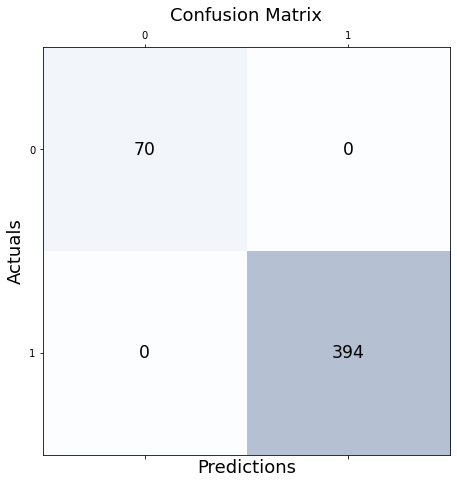

In [305]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [295]:
print(classification_report(y_pred_trainingdata, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       394

    accuracy                           1.00       464
   macro avg       1.00      1.00      1.00       464
weighted avg       1.00      1.00      1.00       464



In [296]:
accuracy_score(y_pred_trainingdata, y_train)

1.0

We are getting 100% accuracy for our training data, this means our model is trained properly

Now lets check for testing data

**Accuracy score for testing data**

In [297]:
y_pred = model.predict(X_test)

In [298]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[15,  3],
       [ 1, 97]])

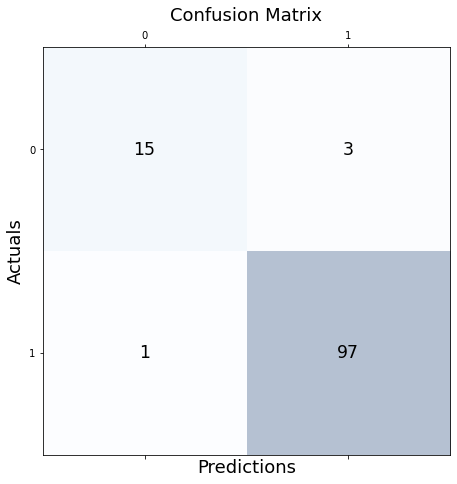

In [299]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [300]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.99      0.97      0.98       100

    accuracy                           0.97       116
   macro avg       0.91      0.95      0.93       116
weighted avg       0.97      0.97      0.97       116



In [301]:
accuracy_score(y_pred, y_test)

0.9655172413793104

We are getting 90% plus accuracy for our model

As difference between accuracy of testing data and training data is less i.e. 0, we can say that our model is not overfit nor underfit.

## **Plotting data**

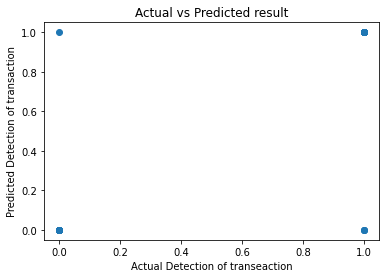

In [302]:
plt.scatter(y_pred, y_test)
plt.xlabel('Actual Detection of transeaction')
plt.ylabel('Predicted Detection of transaction')
plt.title('Actual vs Predicted result')
plt.show()

From the above model we can say that, our model is built 90% plus accurate with small size of data which was about 166 data points. 

We splitted this data as 80% and 20% for the train_test purpose

We took random_state as 16 for constant results on all devices

In [303]:
pickle.dump(model, open('fraud_detection.pkl','wb'))

This file is dumped into pkl extension for connecting to website, Flask purpose